In [37]:
import numpy as np
import model as backend
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
Recording = backend.Model()

In [28]:
exp = copy.deepcopy(Recording)

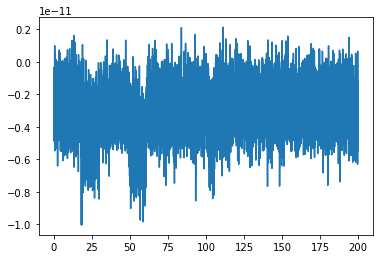

In [29]:
plt.plot(exp['raw_'][0]['time'],exp['raw_'][0]['trace'])

In [30]:
exp.call_operation('BC_',[[0,10],[125,200]],'poly',2)

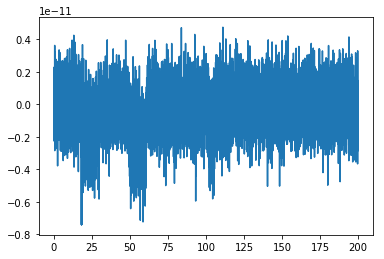

In [31]:
plt.plot(exp['BC_'][0]['time'],exp['BC_'][0]['trace'])

In [35]:
exp.keys(), exp.currentDatakey

(dict_keys(['raw_', 'BC_']), 'BC_')

In [38]:
exp.call_operation('FILTER_',filterFrequency = 1e3)

In [39]:
exp.keys(), exp.currentDatakey

(dict_keys(['raw_', 'BC_', 'BC_FILTER_']), 'BC_FILTER_')

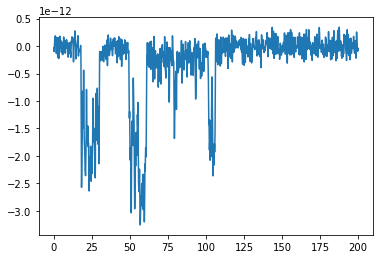

In [40]:
plt.plot(exp['BC_FILTER_'][0]['time'],exp['BC_FILTER_'][0]['trace'])

In [63]:
currentDataKey = 'BC_FILTER_'
data = np.array([])
for episode in exp[currentDataKey]:
    data = np.hstack([data,episode['trace']])

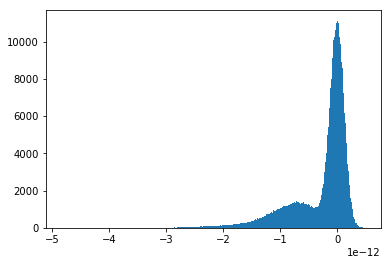

In [66]:
n, b, p = plt.hist(data, 500)

In [70]:
time = exp['BC_FILTER_'][0]['time']
trace = exp['BC_FILTER_'][0]['trace']

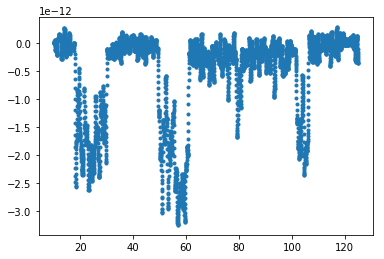

In [83]:
plt.plot(t1,d1,'.')

In [85]:
currentDataKey = 'BC_FILTER_'
activatedata = np.array([])
for episode in exp[currentDataKey]:
    _, trace = interval_selection(episode['time'],episode['trace'],4e4,[10,125])
    activatedata = np.hstack([activatedata,trace])

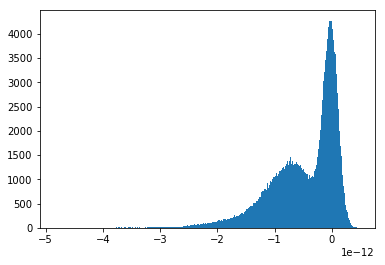

In [86]:
n, b, p = plt.hist(activatedata, 500)

In [121]:
def piezo_selection(time,piezo,trace,active=True):
    maxPiezo = np.max(np.abs(piezo))
    if active:
        indices = np.where((maxPiezo-np.abs(piezo))/maxPiezo<.05)
    else:
        indices = np.where(np.abs(piezo)/maxPiezo<.05)
    print(indices)
    return time[indices],piezo[indices], trace[indices]

In [122]:
time = exp['BC_FILTER_'][0]['time']
piezo = exp['BC_FILTER_'][0]['piezo']
trace = exp['BC_FILTER_'][0]['trace']

In [114]:
maxPiezo = np.max(np.abs(piezo))
indices = (np.abs(piezo))/maxPiezo<.05

In [115]:
indices

array([False, False, False, ..., False, False, False], dtype=bool)

In [123]:
t,p, d = piezo_selection(time,piezo,trace,active=False)

(array([   0,    1,    2, ..., 7997, 7998, 7999]),)


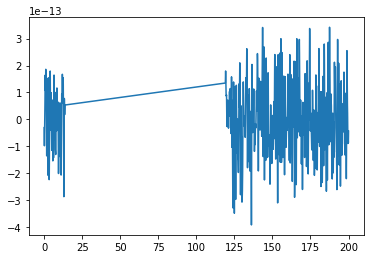

In [124]:
plt.plot(t,d)

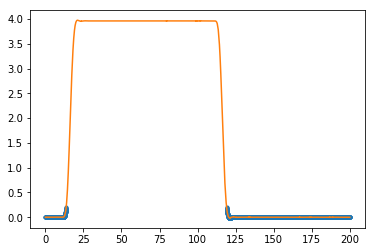

In [125]:
plt.plot(t,p,'.')
plt.plot(time,piezo)

In [96]:
time

array([  2.50000000e-02,   5.00000000e-02,   7.50000000e-02, ...,
         1.99950000e+02,   1.99975000e+02,   2.00000000e+02])